<a href="https://colab.research.google.com/github/D3TaLES/databases_demo/blob/main/notebooks/processing_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Procesing data with code.

In this notebook, we will demonstrate how to process data with python. Automated data processing has a couple advantanges over manual data parsing including reduction in human error and the fact that (after the initial effort of encoding the process) automated procesing can be used repeatedly to get results with no additional effort. As an example, we will process experimental absorption data from a CSV file. 

We use [pandas](https://pandas.pydata.org/) for handling data and [scipy](https://scipy.org/) for processing spectral data to find peaks and calculate the optical gap. This processing consists of four processing steps shown in the figure below. 

![](https://drive.google.com/uc?export=view&id=11u3qkqj-Pv6yj_QEocRXbEVmBKEkMxxb)

Note: The packages used here are already installed in colab, so we will only import the packages. In case you do not have the pacakages installed, please install pandas and scipy.

##STEP 0: Import python packages and get raw data files 

In [ ]:
# Import pandas and scipy definitions
import pandas as pd  
from scipy.signal import find_peaks  

The code below will fetch the sample absorption data files from GitHub

In [ ]:
# Pull example data files from GitHub
! rm -r databases_demo/ # remove database_demo directory if it already exists
! git clone https://github.com/D3TaLES/databases_demo.git # get code from GitHub repository 

rm: cannot remove 'databases_demo/': No such file or directory
Cloning into 'databases_demo'...
remote: Enumerating objects: 372, done.
remote: Counting objects: 100% (68/68), done.
remote: Compressing objects: 100% (60/60), done.
remote: Total 372 (delta 30), reused 25 (delta 8), pack-reused 304
Receiving objects: 100% (372/372), 696.73 KiB | 6.11 MiB/s, done.
Resolving deltas: 100% (198/198), done.


## STEP 1: Read spectrometer CSV files with the pandas package
For easy handling of data, we will create a pandas DataFrame from the CSV file. Our CSV file is located in databases_demo --> raw_data folder. The following cell will also display the sample data

In [ ]:
# Use pandas package to read csv file
data = pd.read_csv("databases_demo/raw_data/uvvis_biphenyl.csv", header=3, names=['wavelength', 'absorbance'])
data

,wavelength,absorbance
0,1005.0,5.044220e-04
1,997.0,5.830790e-04
2,989.0,6.672890e-04
3,981.0,7.560560e-04
4,973.0,8.481010e-04
...,...,...
403,235.0,3.970000e-07
404,235.0,2.480000e-07
405,235.0,1.540000e-07
406,234.0,9.450000e-08


We can plot the data to get absorption spectrum

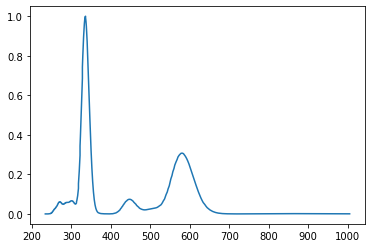

In [ ]:
import matplotlib.pyplot as plt

plt.plot("wavelength","absorbance",data=data)

## STEP 2: Find absorbance peaks wtih the scipy package
To process the data, let's use find_peaks function from scipy library. We will get the peaks above absorbance of 0.3. This implies to setting height=0.3 in the code below

In [ ]:
# Use scipy package to find the absorbance peaks
peaks, _ = find_peaks(data.absorbance, height=0.3)

print(peaks) # Show indexes for the absorbance peaks

array([ 90, 246])

##STEP 3: Get the wavelength values for each peak

In [ ]:
# Find the wavelength values the correspond to the absorbance peaks
peaks_wavelength = [data.wavelength[p]for p in peaks]

# Display wavelength of the extracted peaks
peaks_wavelength

[581.0, 336.0]

##STEP 4: Find the peak with the minimum energy (maximum wavelength). 
Visual inspection of the absorption spectrum above confirms that the code is able to get the peaks. We can also do further analysis with this data. For example, we will get the optical gap in eV.

In [ ]:
# Find the first (highest wavelength, lowest energy) value for the absorbance peaks
first_peak =  max(peaks_wavelength) # Get minimum energy by finding the maximum wavelength 

# convert wavelength to eV
optical_gap = round(1240 / first_peak, 3)
print(optical_gap)

2.134


##ANOTHER STEP: Adding data to database

The code below demonstrates how data is transformed before inserted into the database. This is used in SQL and No-SQL notebooks

First we read the data, for instance CSV file, then use to_dict function to process it before final transformation 

In [ ]:
# Read data
data = pd.read_csv("databases_demo/raw_data/uvvis_biphenyl.csv", header=3, names=['wavelength', 'absorbance'])

# Processing 
absorbance_data = data.to_dict('records')
print(absorbance_data[:10]) # Show first 10 absorbance data records

[{'wavelength': 1005.0, 'absorbance': 0.000504422}, {'wavelength': 997.0, 'absorbance': 0.000583079}, {'wavelength': 989.0, 'absorbance': 0.000667289}, {'wavelength': 981.0, 'absorbance': 0.000756056}, {'wavelength': 973.0, 'absorbance': 0.000848101}, {'wavelength': 966.0, 'absorbance': 0.000941877}, {'wavelength': 958.0, 'absorbance': 0.001035605}, {'wavelength': 951.0, 'absorbance': 0.001127321}, {'wavelength': 944.0, 'absorbance': 0.001214939}, {'wavelength': 937.0, 'absorbance': 0.001296327}]
